In [1]:
# important to note that numpy version must be less than 2
import numpy as np
import torch, torchaudio
import datasets
from datasets import config

print("numpy:", np.__version__)
print("torch:", torch.__version__)
print("torchaudio:", torchaudio.__version__)
print("datasets:", datasets.__version__)

numpy: 1.26.4
torch: 2.2.2
torchaudio: 2.2.2
datasets: 2.19.2


In [ ]:
from datasets import load_dataset, Audio

ds = load_dataset("librispeech_asr", "clean", split="validation")
ds = ds.cast_column("audio", Audio(decode=False))

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/2620 [00:00<?, ? examples/s]

Generating train.100 split:   0%|          | 0/28539 [00:00<?, ? examples/s]

Generating train.360 split:   0%|          | 0/104014 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2703 [00:00<?, ? examples/s]

dict_keys(['bytes', 'path'])


TypeError: 'dict_keys' object is not subscriptable

In [4]:
import soundfile as sf
from pathlib import Path
import io

ex = ds[0]
audio_info = ex["audio"]

# Prefer bytes if available (works even when path is relative)
if audio_info.get("bytes") is not None:
    x, sr = sf.read(io.BytesIO(audio_info["bytes"]))
else:
    path = Path(audio_info["path"])
    if not path.is_file():
        # Resolve relative path against HF cache
        cache_dir = Path(ds.cache_files[0]["filename"]).parent
        path = cache_dir / path
    x, sr = sf.read(path)

print(sr, len(x))

16000 105440


In [4]:
from datasets import load_dataset, Audio

ds = load_dataset("librispeech_asr", "clean", split="validation")
ds = ds.cast_column("audio", Audio(decode=False))

ex = ds[0]
print("Transcript:", ex["text"])
print("Audio metadata:", ex["audio"])

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Transcript: HE WAS IN A FEVERED STATE OF MIND OWING TO THE BLIGHT HIS WIFE'S ACTION THREATENED TO CAST UPON HIS ENTIRE FUTURE
Audio metadata: {'bytes': b'fLaC\x00\x00\x00"\x10\x00\x10\x00\x00\tW\x00\x15\x1a\x03\xe8\x00\xf0\x00\x01\x9b\xe0\x15\x90\xba\x94\xff\xf5\x8c\xa5j"\x9b\xf1\xe9PZq\x03\x00\x00\x12\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x04\x00\x00( \x00\x00\x00reference libFLAC 1.2.1 20070917\x00\x00\x00\x00\x81\x00 \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

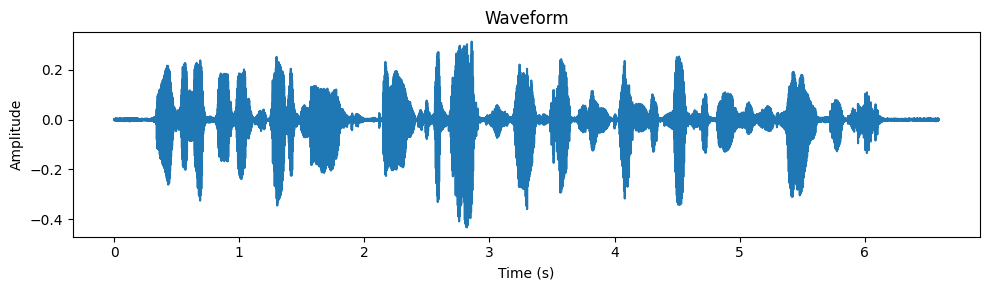

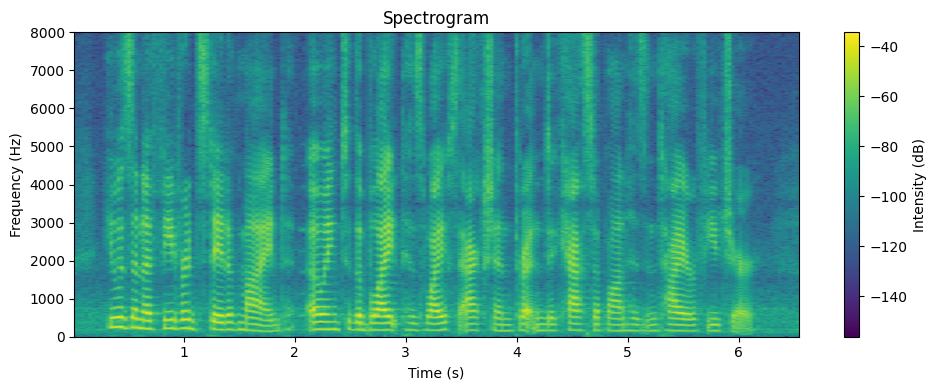

In [9]:
from datasets import load_dataset, Audio
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import io
from pathlib import Path

ds = load_dataset("librispeech_asr", "clean", split="validation")
ds = ds.cast_column("audio", Audio(decode=False))

ex = ds[0]
audio = ex["audio"]

if audio.get("bytes") is not None:
    x, sr = sf.read(io.BytesIO(audio["bytes"]))
else:
    path = Path(audio["path"])
    if not path.is_file():
        cache_dir = Path(ds.cache_files[0]["filename"]).parent
        path = cache_dir / path
    x, sr = sf.read(path)

t = np.arange(len(x)) / sr
plt.figure(figsize=(10, 3))
plt.plot(t, x)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.specgram(x, NFFT=1024, Fs=sr, noverlap=512)
plt.title("Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Intensity (dB)")
plt.tight_layout()
plt.show()


Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

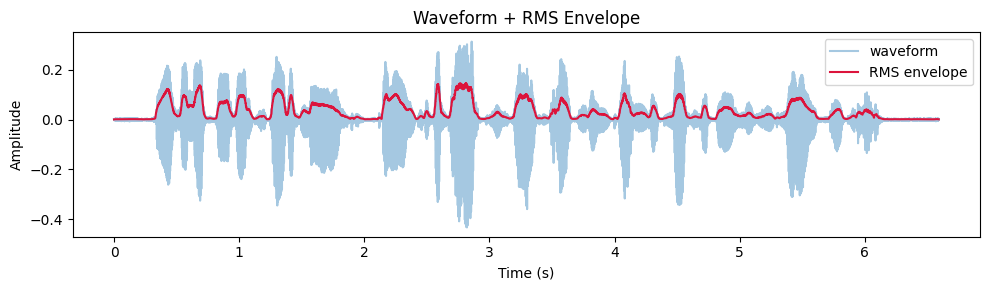

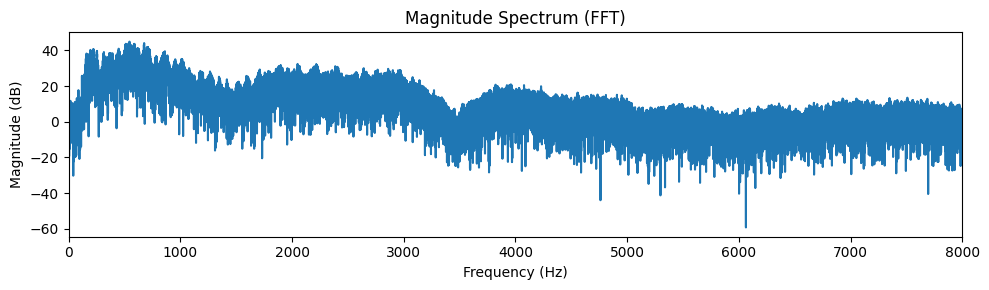

In [10]:
from datasets import load_dataset, Audio
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import io
from pathlib import Path

# Load
ds = load_dataset("librispeech_asr", "clean", split="validation")
ds = ds.cast_column("audio", Audio(decode=False))
ex = ds[0]
audio = ex["audio"]

# Read audio bytes/path
if audio.get("bytes") is not None:
    x, sr = sf.read(io.BytesIO(audio["bytes"]))
else:
    path = Path(audio["path"])
    if not path.is_file():
        cache_dir = Path(ds.cache_files[0]["filename"]).parent
        path = cache_dir / path
    x, sr = sf.read(path)

# Mono + float
if x.ndim == 2:
    x = x.mean(axis=1)
x = x.astype(np.float32, copy=False)

# ---- 1) Waveform + RMS envelope ----
win = int(0.02 * sr)  # 20 ms window
rms = np.sqrt(np.convolve(x**2, np.ones(win)/win, mode="same"))

t = np.arange(len(x)) / sr
plt.figure(figsize=(10, 3))
plt.plot(t, x, alpha=0.4, label="waveform")
plt.plot(t, rms, color="crimson", label="RMS envelope")
plt.title("Waveform + RMS Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

# ---- 2) Frequency spectrum (FFT) ----
n = 1 << (len(x) - 1).bit_length()  # next pow2
fft = np.fft.rfft(x, n=n)
freqs = np.fft.rfftfreq(n, d=1/sr)
mag = 20 * np.log10(np.maximum(np.abs(fft), 1e-8))

plt.figure(figsize=(10, 3))
plt.plot(freqs, mag)
plt.title("Magnitude Spectrum (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.xlim(0, sr/2)
plt.tight_layout()
plt.show()


Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

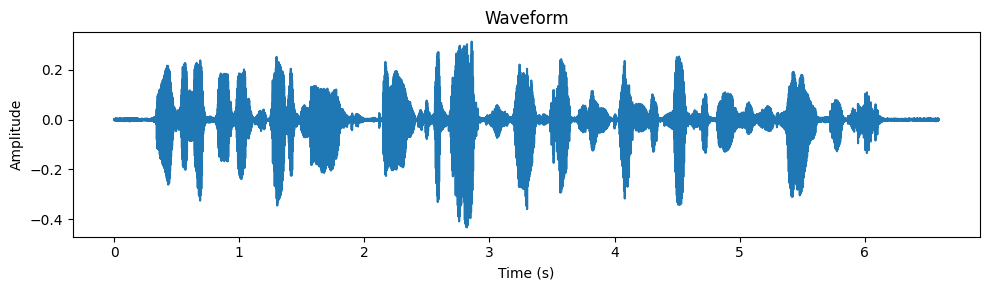

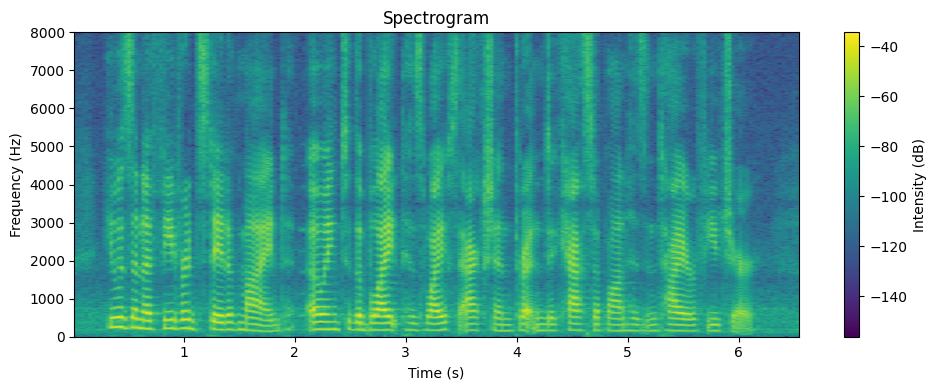

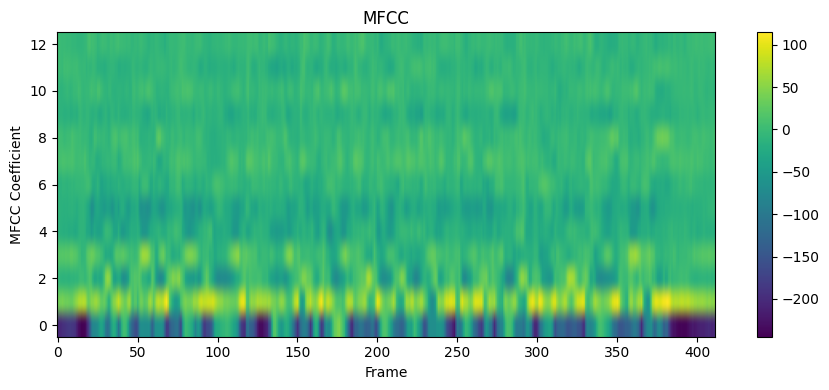

In [12]:
from datasets import load_dataset, Audio
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import io
from pathlib import Path
import torch
import torchaudio

ds = load_dataset("librispeech_asr", "clean", split="validation")
ds = ds.cast_column("audio", Audio(decode=False))

ex = ds[0]
audio = ex["audio"]

# Read audio without HF decoding
if audio.get("bytes") is not None:
    x, sr = sf.read(io.BytesIO(audio["bytes"]))
else:
    path = Path(audio["path"])
    if not path.is_file():
        cache_dir = Path(ds.cache_files[0]["filename"]).parent
        path = cache_dir / path
    x, sr = sf.read(path)

# Mono + float
if x.ndim == 2:
    x = x.mean(axis=1)
x = x.astype(np.float32, copy=False)

# Waveform
t = np.arange(len(x)) / sr
plt.figure(figsize=(10, 3))
plt.plot(t, x)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Spectrogram (matplotlib)
plt.figure(figsize=(10, 4))
plt.specgram(x, NFFT=1024, Fs=sr, noverlap=512)
plt.title("Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Intensity (dB)")
plt.tight_layout()
plt.show()

# MFCC (torchaudio)
wav = torch.tensor(x).unsqueeze(0)
mfcc = torchaudio.transforms.MFCC(
    sample_rate=sr,
    n_mfcc=13,
    melkwargs={"n_fft": 1024, "hop_length": 256, "n_mels": 64},
)(wav)[0].numpy()

plt.figure(figsize=(9, 4))
plt.imshow(mfcc, aspect="auto", origin="lower")
plt.title("MFCC")
plt.xlabel("Frame")
plt.ylabel("MFCC Coefficient")
plt.colorbar()
plt.tight_layout()
plt.show()


True /Users/vihaanmishra/Projects/DysarthricSpeechProject/data/raw/uaspeech/audio/M10/M10_B1_C12_M2.wav
File: /Users/vihaanmishra/Projects/DysarthricSpeechProject/data/raw/uaspeech/audio/M10/M10_B1_C12_M2.wav
Sample rate: 16000 Samples: 34832 Duration (s): 2.177


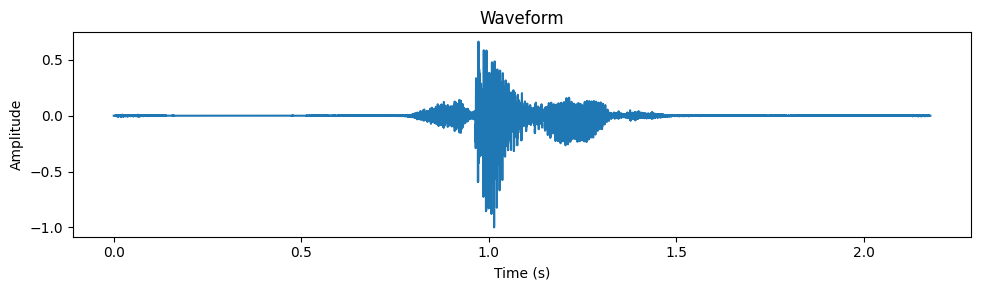

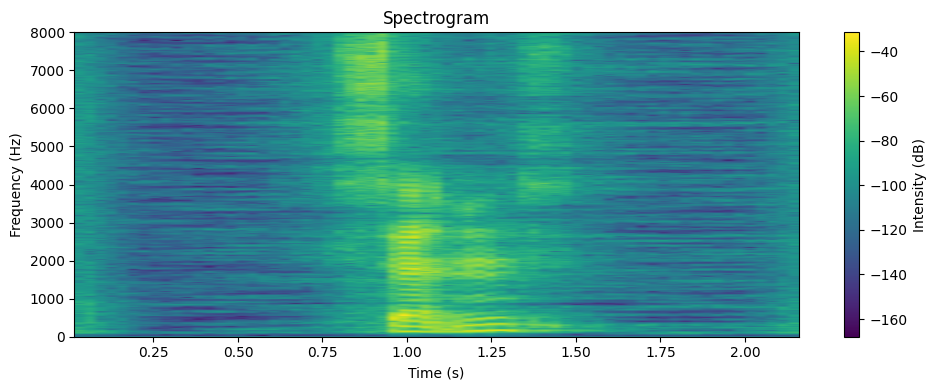

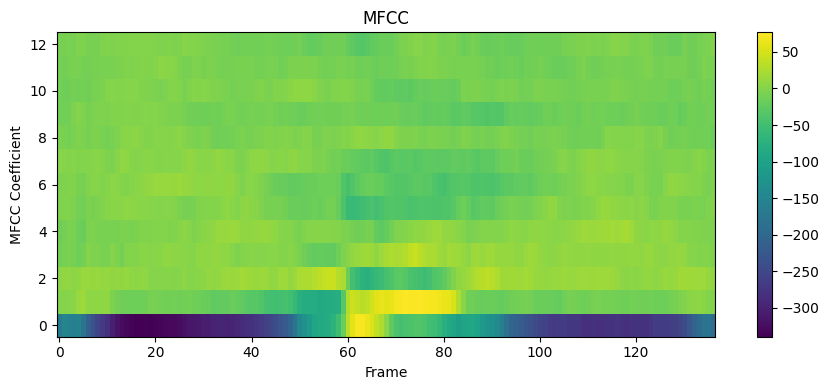

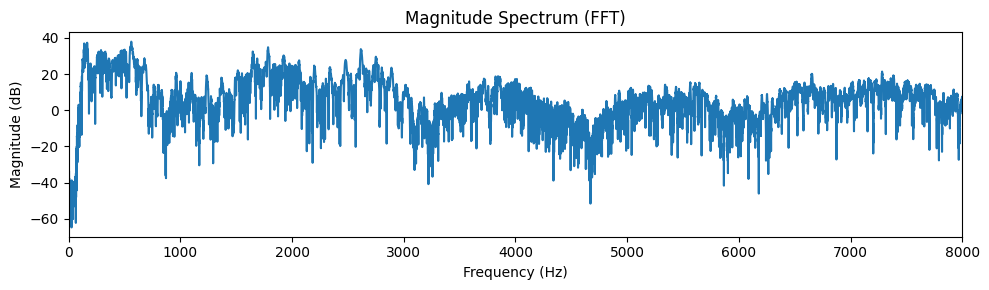

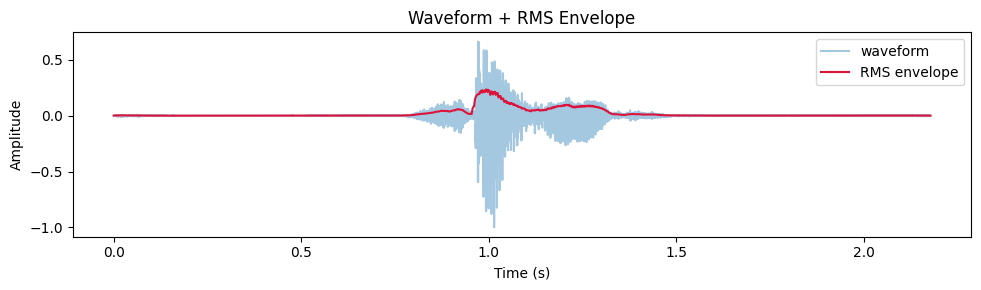

In [25]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import torch
import torchaudio

wav_path = Path("~/Projects/DysarthricSpeechProject/data/raw/uaspeech/audio/M10/M10_B1_C12_M2.wav").expanduser()
print(wav_path.exists(), wav_path)
x, sr = sf.read(wav_path)

# Mono + float
if x.ndim == 2:
    x = x.mean(axis=1)
x = x.astype(np.float32, copy=False)

print("File:", wav_path)
print("Sample rate:", sr, "Samples:", len(x), "Duration (s):", len(x)/sr)

# Waveform
t = np.arange(len(x)) / sr
plt.figure(figsize=(10, 3))
plt.plot(t, x)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Spectrogram
plt.figure(figsize=(10, 4))
plt.specgram(x, NFFT=1024, Fs=sr, noverlap=512)
plt.title("Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Intensity (dB)")
plt.tight_layout()
plt.show()

# MFCC
wav = torch.tensor(x).unsqueeze(0)
mfcc = torchaudio.transforms.MFCC(
    sample_rate=sr,
    n_mfcc=13,
    melkwargs={"n_fft": 1024, "hop_length": 256, "n_mels": 64},
)(wav)[0].numpy()

plt.figure(figsize=(9, 4))
plt.imshow(mfcc, aspect="auto", origin="lower")
plt.title("MFCC")
plt.xlabel("Frame")
plt.ylabel("MFCC Coefficient")
plt.colorbar()
plt.tight_layout()
plt.show()

# Magnitude Spectrum (FFT)
n = 1 << (len(x) - 1).bit_length()
fft = np.fft.rfft(x, n=n)
freqs = np.fft.rfftfreq(n, d=1/sr)
mag = 20 * np.log10(np.maximum(np.abs(fft), 1e-8))

plt.figure(figsize=(10, 3))
plt.plot(freqs, mag)
plt.title("Magnitude Spectrum (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.xlim(0, sr/2)
plt.tight_layout()
plt.show()

# Waveform + RMS envelope
win = int(0.02 * sr)
rms = np.sqrt(np.convolve(x**2, np.ones(win)/win, mode="same"))

plt.figure(figsize=(10, 3))
plt.plot(t, x, alpha=0.4, label="waveform")
plt.plot(t, rms, color="crimson", label="RMS envelope")
plt.title("Waveform + RMS Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
from datasets import load_dataset, Audio

# Load dataset
ds = load_dataset("librispeech_asr", "clean", split="validation")

# IMPORTANT: disable HF audio decoding
ds = ds.cast_column("audio", Audio(decode=False))

ex = ds[0]
print(ex.keys())
print(ex["audio"])
print("Transcript:", ex["text"])


Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

dict_keys(['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id'])
{'bytes': b'fLaC\x00\x00\x00"\x10\x00\x10\x00\x00\tW\x00\x15\x1a\x03\xe8\x00\xf0\x00\x01\x9b\xe0\x15\x90\xba\x94\xff\xf5\x8c\xa5j"\x9b\xf1\xe9PZq\x03\x00\x00\x12\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x04\x00\x00( \x00\x00\x00reference libFLAC 1.2.1 20070917\x00\x00\x00\x00\x81\x00 \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [3]:
!python -m pip install -U torchcodec
!python -m pip install -U soundfile

In [1]:
# ============================================================
# Notebook: Displaying Speech Data (Waveforms + MFCCs)
# LibriSpeech via Hugging Face + optional local UASpeech file
# ============================================================

import os
import random
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from datasets import load_dataset

# Torch/Torchaudio for MFCCs (avoids librosa/numba/llvmlite issues)
import torch
import torchaudio


# ----------------------------
# 0) Repro + display helpers
# ----------------------------
RNG_SEED = 0
random.seed(RNG_SEED)
np.random.seed(RNG_SEED)

def ensure_mono(x: np.ndarray) -> np.ndarray:
    """
    If audio is stereo (shape [T, C] or [C, T]), convert to mono.
    """
    if x.ndim == 1:
        return x
    # Handle common shapes
    if x.ndim == 2:
        # If shape is (T, C), average channels
        if x.shape[0] > x.shape[1]:
            return x.mean(axis=1)
        # If shape is (C, T), average channels
        return x.mean(axis=0)
    raise ValueError(f"Unexpected audio shape: {x.shape}")

def basic_audio_stats(x: np.ndarray, sr: int) -> dict:
    x = x.astype(np.float32, copy=False)
    dur = len(x) / float(sr)
    rms = float(np.sqrt(np.mean(x**2))) if len(x) else 0.0
    peak = float(np.max(np.abs(x))) if len(x) else 0.0
    return {
        "sr_hz": int(sr),
        "num_samples": int(len(x)),
        "duration_s": float(dur),
        "rms": float(rms),
        "peak_abs": float(peak),
    }

def plot_waveform(x: np.ndarray, sr: int, title: str, max_seconds: float | None = None) -> None:
    x = ensure_mono(x)
    if max_seconds is not None:
        max_samples = int(max_seconds * sr)
        x = x[:max_samples]
    t = np.arange(len(x)) / sr

    plt.figure(figsize=(10, 3))
    plt.plot(t, x)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.tight_layout()
    plt.show()

def compute_mfcc_torchaudio(
    x: np.ndarray,
    sr: int,
    n_mfcc: int = 13,
    n_fft: int = 1024,
    hop_length: int = 256,
    n_mels: int = 40,
    center: bool = True,
) -> np.ndarray:
    """
    Returns MFCC array shaped (n_mfcc, frames)
    Notes on parameters (high level):
      - n_fft: window size for frequency analysis; larger -> better frequency resolution, worse time localization + more compute.
      - hop_length: step between frames; smaller -> more frames (higher time resolution), more compute.
      - n_mels: mel filterbank count; larger -> finer frequency detail before compression.
      - n_mfcc: how many cepstral coefficients kept; larger -> higher-dimensional feature.
    """
    x = ensure_mono(x).astype(np.float32, copy=False)
    wav = torch.tensor(x).unsqueeze(0)  # (1, T)

    mfcc_tf = torchaudio.transforms.MFCC(
        sample_rate=sr,
        n_mfcc=n_mfcc,
        melkwargs={
            "n_fft": n_fft,
            "hop_length": hop_length,
            "n_mels": n_mels,
            "center": center,
        },
    )
    with torch.no_grad():
        mfcc = mfcc_tf(wav)[0].cpu().numpy()  # (n_mfcc, frames)
    return mfcc

def plot_mfcc(mfcc: np.ndarray, title: str) -> None:
    plt.figure(figsize=(9, 4))
    plt.imshow(mfcc, aspect="auto", origin="lower")
    plt.xlabel("Frame index")
    plt.ylabel("MFCC coefficient")
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

def frames_to_ms(frames: int, sr: int, hop_length: int) -> float:
    # Approx time covered by frame axis (not exact alignment detail, but good enough for intuition)
    return (frames * hop_length / sr) * 1000.0


# ----------------------------------------
# 1) Load LibriSpeech (Hugging Face)
# ----------------------------------------
print("HF_HOME =", os.environ.get("HF_HOME"))
print("HF_DATASETS_CACHE =", os.environ.get("HF_DATASETS_CACHE"))

# Use validation for quick iteration
ds_val = load_dataset("librispeech_asr", "clean", split="validation")

# Take a small subset to "play around" without heavy compute
N = 32
ds_small = ds_val.shuffle(seed=RNG_SEED).select(range(N))
print(ds_small)


# ------------------------------------------------------------
# 2) Inspect a few samples (transcript + stats + waveform plot)
# ------------------------------------------------------------
def show_sample(ds, idx: int, label: str = "LibriSpeech") -> None:
    ex = ds[idx]
    x = ex["audio"]["array"]
    sr = ex["audio"]["sampling_rate"]
    text = ex.get("text", "")

    stats = basic_audio_stats(ensure_mono(x), sr)
    print(f"\n[{label}] idx={idx}")
    print("Transcript:", text)
    print("Stats:", stats)

    plot_waveform(x, sr, title=f"{label} waveform (idx={idx})", max_seconds=8.0)

# Show 3 random samples
for idx in random.sample(range(len(ds_small)), 3):
    show_sample(ds_small, idx)


# ------------------------------------------------------------
# 3) MFCC on one sample with chosen parameters
# ------------------------------------------------------------
idx = 0
ex = ds_small[idx]
x = ex["audio"]["array"]
sr = ex["audio"]["sampling_rate"]

# Base parameters (these are reasonable defaults for speech @ 16kHz)
base_params = dict(n_mfcc=13, n_fft=1024, hop_length=256, n_mels=40, center=True)

mfcc = compute_mfcc_torchaudio(x, sr, **base_params)
print("\nMFCC shape:", mfcc.shape, "(n_mfcc, frames)")
print("Approx frame-axis time span (ms):", frames_to_ms(mfcc.shape[1], sr, base_params["hop_length"]))

plot_mfcc(
    mfcc,
    title=(
        f"MFCC (n_mfcc={base_params['n_mfcc']}, n_fft={base_params['n_fft']}, "
        f"hop={base_params['hop_length']}, n_mels={base_params['n_mels']})"
    ),
)


# ------------------------------------------------------------
# 4) "Play around": change ONE parameter at a time
#    Goal: build intuition for what each parameter changes.
# ------------------------------------------------------------

# 4a) Change hop_length (time resolution)
params_hop_small = dict(base_params)
params_hop_small["hop_length"] = 128  # smaller hop -> more frames -> higher time resolution
mfcc_hop_small = compute_mfcc_torchaudio(x, sr, **params_hop_small)

params_hop_big = dict(base_params)
params_hop_big["hop_length"] = 512  # larger hop -> fewer frames -> lower time resolution
mfcc_hop_big = compute_mfcc_torchaudio(x, sr, **params_hop_big)

print("\n[hop_length experiment]")
print("base hop:", base_params["hop_length"], "frames:", mfcc.shape[1])
print("small hop:", params_hop_small["hop_length"], "frames:", mfcc_hop_small.shape[1])
print("big hop:", params_hop_big["hop_length"], "frames:", mfcc_hop_big.shape[1])

plot_mfcc(mfcc_hop_small, title=f"MFCC with hop_length={params_hop_small['hop_length']} (more frames)")
plot_mfcc(mfcc_hop_big, title=f"MFCC with hop_length={params_hop_big['hop_length']} (fewer frames)")


# 4b) Change n_fft (frequency resolution / window size)
params_fft_small = dict(base_params)
params_fft_small["n_fft"] = 512

params_fft_big = dict(base_params)
params_fft_big["n_fft"] = 2048

mfcc_fft_small = compute_mfcc_torchaudio(x, sr, **params_fft_small)
mfcc_fft_big = compute_mfcc_torchaudio(x, sr, **params_fft_big)

print("\n[n_fft experiment]")
print("small n_fft:", params_fft_small["n_fft"], "MFCC shape:", mfcc_fft_small.shape)
print("base  n_fft:", base_params["n_fft"], "MFCC shape:", mfcc.shape)
print("big   n_fft:", params_fft_big["n_fft"], "MFCC shape:", mfcc_fft_big.shape)

plot_mfcc(mfcc_fft_small, title=f"MFCC with n_fft={params_fft_small['n_fft']} (smaller window)")
plot_mfcc(mfcc_fft_big, title=f"MFCC with n_fft={params_fft_big['n_fft']} (larger window)")


# 4c) Change n_mels (mel filterbank granularity)
params_mels_small = dict(base_params)
params_mels_small["n_mels"] = 20

params_mels_big = dict(base_params)
params_mels_big["n_mels"] = 80

mfcc_mels_small = compute_mfcc_torchaudio(x, sr, **params_mels_small)
mfcc_mels_big = compute_mfcc_torchaudio(x, sr, **params_mels_big)

print("\n[n_mels experiment]")
print("small n_mels:", params_mels_small["n_mels"], "MFCC shape:", mfcc_mels_small.shape)
print("base  n_mels:", base_params["n_mels"], "MFCC shape:", mfcc.shape)
print("big   n_mels:", params_mels_big["n_mels"], "MFCC shape:", mfcc_mels_big.shape)

plot_mfcc(mfcc_mels_small, title=f"MFCC with n_mels={params_mels_small['n_mels']}")
plot_mfcc(mfcc_mels_big, title=f"MFCC with n_mels={params_mels_big['n_mels']}")


# 4d) Change n_mfcc (feature dimensionality)
params_mfcc_small = dict(base_params)
params_mfcc_small["n_mfcc"] = 13

params_mfcc_big = dict(base_params)
params_mfcc_big["n_mfcc"] = 40

mfcc_mfcc_small = compute_mfcc_torchaudio(x, sr, **params_mfcc_small)
mfcc_mfcc_big = compute_mfcc_torchaudio(x, sr, **params_mfcc_big)

print("\n[n_mfcc experiment]")
print("n_mfcc=13:", mfcc_mfcc_small.shape)
print("n_mfcc=40:", mfcc_mfcc_big.shape)

plot_mfcc(mfcc_mfcc_small, title="MFCC with n_mfcc=13 (lower-dimensional)")
plot_mfcc(mfcc_mfcc_big, title="MFCC with n_mfcc=40 (higher-dimensional)")


# ------------------------------------------------------------
# 5) Optional: Load ONE local UASpeech .wav and repeat plots
# ------------------------------------------------------------
# Update this path if your UASpeech audio folder differs
uaspeech_audio_dir = Path("../data/raw/uaspeech/audio")

if uaspeech_audio_dir.exists():
    wav_files = sorted(uaspeech_audio_dir.rglob("*.wav"))
    print(f"\nFound {len(wav_files)} UASpeech wav files under:", uaspeech_audio_dir)

    if wav_files:
        import soundfile as sf

        uas_wav_path = random.choice(wav_files)
        x_u, sr_u = sf.read(uas_wav_path)
        x_u = ensure_mono(x_u)

        print("\n[UASpeech example]")
        print("File:", uas_wav_path.name)
        print("Stats:", basic_audio_stats(x_u, sr_u))

        plot_waveform(x_u, sr_u, title=f"UASpeech waveform ({uas_wav_path.name})", max_seconds=8.0)

        mfcc_u = compute_mfcc_torchaudio(x_u, sr_u, **base_params)
        print("UASpeech MFCC shape:", mfcc_u.shape)
        plot_mfcc(mfcc_u, title=f"UASpeech MFCC ({uas_wav_path.name})")
else:
    print("\nUASpeech audio directory not found at:", uaspeech_audio_dir)
    print("If needed, update 'uaspeech_audio_dir' to your local UASpeech path.")


HF_HOME = /Users/vihaanmishra/data/hf_cache
HF_DATASETS_CACHE = /Users/vihaanmishra/data/hf_cache/datasets


Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Dataset({
    features: ['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id'],
    num_rows: 32
})
Stay tuned...


ModuleNotFoundError: No module named 'torchcodec.decoders'